In [1]:
!pip install astropy

     |████████████████████████████████| 11.4 MB 635 kB/s            
     |████████████████████████████████| 749 kB 68.6 MB/s            
     |████████████████████████████████| 17.3 MB 89.8 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.0+nv requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
def chunkstring(string, length):
  return (string[0+i:length+i] for i in range(0, len(string), length))


In [3]:
def load_fits(filnam):
  hdulist = fits.open(filnam)
  meta = {}
  h = list(chunkstring(hdulist[0].header, 80))
  for index, item in enumerate(h):
    m = str(item)
    mh = list(chunkstring(m, 80))
    #print(mh)
    for ix, im in enumerate(mh):
      #print(index, ix, im)
      mm = im.split('/')[0].split('=')
      if len(mm) == 2:
        #print(index, ix, mm[0], mm[1])
        meta[mm[0].strip()] = mm[1].strip()
  #nAxes = int(meta['NAXIS'])
  # check this logic in MOPS FITS files
  data = hdulist[0].data
  hdulist.close
  return data, meta

 [astropy.io.fits.verify]


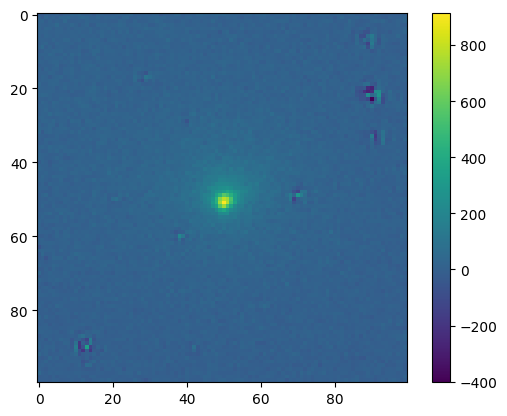

In [5]:
if __name__ == '__main__':
  fits_file = '../FITStamp/03a60022o0354c.06484'
  img, meta = load_fits(fits_file)

  # Plot the 2D image data
  plt.imshow(img.T)
  plt.colorbar()
  plt.show()

In [6]:
  print(meta)

{'SIMPLE': 'T', 'BITPIX': '-32', 'NAXIS': '2', 'NAXIS1': '100', 'NAXIS2': '100', 'XTENSION': "'IMAGE   '", 'PCOUNT': '0', 'GCOUNT': '1', 'TIMESYS': "'UTC'", 'RADESYS': "'FK5'", 'BZERO': '0.0000000000000E+00', 'BSCALE': '1.0000000000000E+00', 'MJD-OBS': '60021.89210745', 'MJD-CAM': '60021.8921034375', 'CTRLID': "'0034A8867071B054'", 'EXPTIME': '30.0000', 'DARKWAIT': '0.6', 'DARKTIME': '30.6', 'PRESKIP1': '10', 'PIXREAD1': '1350', 'OVRSKIP1': '0', 'OVRSCAN1': '0', 'PRESKIP2': '0', 'PIXREAD2': '5300', 'OVRSKIP2': '0', 'OVRSCAN2': '0', 'CCDBIN1': '1', 'CCDBIN2': '1', 'EADU': '1.9', 'GAIN': '1.9', 'ARCH_SEQ': '4444055', 'ARCH_TBK': '28.562', 'ARCH_T1': '26.812', 'ARCH_T2': '30.25', 'ARCH_T3': '33.25', 'ARCH_T4': '38.437', 'ARCH_T5': '31.187', 'ARCH_T6': '29.812', 'ARCH_T7': '30.062', 'ARCH_T8': '28.562', 'ARCH_T9': '29.937', 'ARCH_T10': '29.562', 'AC_RTD1': '782.272', 'AC_RTD2': '761.402', 'AC_RTD3': '763.419', 'AC_RTD4': '1023.522', 'AC_RTD5': '1037.518', 'AC_RTD6': '1039.054', 'AC_RTD7': 

In [7]:
print(meta['MOONSKY'])
print(meta['SEEING'])
print(meta['AIRMASS'])
print(meta['SKYMAG'])

21.00
4.238
1.036
20.82
